In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/wzh/dataoulu2022/ProjectWork/day.csv')
df
# day.csv is picked up from Bike-Sharing-Dataset.zip, and;  
# The link https://archive.ics.uci.edu/ml/machine-learning-databases/00275/

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
### temp : Normalized temperature in Celsius. The values are divided to 41 (max)
### atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
### hum: Normalized humidity. The values are divided to 100 (max)
### windspeed: Normalized wind speed. The values are divided to 67 (max)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
# There are totally 731 records between 01-01-2011 to 31-12-2012
# The maximum cnt(the count of rent bike includes casual bike and registered bike) is 8714, and the minimum cnt is 22.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# pick up the top 10 of cnt
top_rentbikecnt = df['cnt'].nlargest(n=10)
#top_rentbikecnt = df.nlargest( n=10, columns=['casual', 'cnt'])
top_rentbikecnt

623    8714
637    8555
630    8395
447    8362
504    8294
617    8227
571    8173
629    8167
643    8156
518    8120
Name: cnt, dtype: int64

In [9]:
# pick up the low 10 of cnt
low_rentbikecnt = pd.DataFrame(df.nsmallest(10, ['cnt']))
low_rentbikecnt

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627
17,18,2011-01-18,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9,674,683
340,341,2011-12-07,4,0,12,0,3,1,3,0.410000,0.400246,0.970417,0.266175,50,655,705
358,359,2011-12-25,1,0,12,0,0,0,1,0.274783,0.279961,0.681304,0.155091,303,451,754


In [10]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [33]:
# Remove 'instant', 'yr', 'mnth', 'weekday', 'casual', 'registered' columns
ds= df.drop(columns=['instant', 'yr', 'mnth', 'weekday', 'casual', 'registered'])
ds

,dteday,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,0,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,2012-12-28,1,0,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,2012-12-29,1,0,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,2012-12-30,1,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [12]:
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

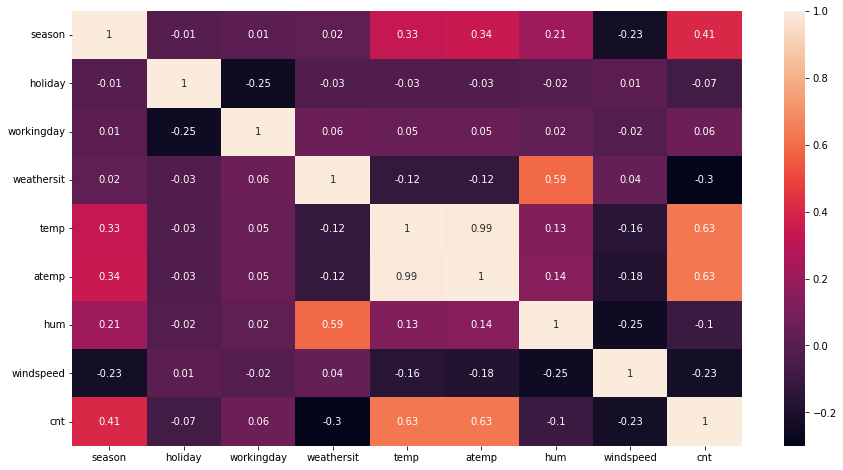

In [13]:
# generate a heatmap to see the correlation between variables
plt.figure(figsize = (15,8)) # set figure size for heatmap
sns.heatmap(data=ds.corr().round(2), annot=True)
#sns.heatmap(data=df.corr().round(2).abs(), annot=True)  #abs(), all result values are positive
plt.show()

## from the heatmap, we get the following
### temp(temperature) and atemp(feeling temperature) variable has a linear relationship
### temp/atemp and season vailable has more effect on daily rent bike rather than holiday, workingday,
### weathersit(weather condition: clear, cloud ), hum (humidity) or windspeed.

In [34]:
# Remove 'holiday', 'workingday', 'hum' columns
dss= ds.drop(columns=['holiday', 'workingday', 'hum'])
dss

,dteday,season,weathersit,temp,atemp,windspeed,cnt
0,2011-01-01,1,2,0.344167,0.363625,0.160446,985
1,2011-01-02,1,2,0.363478,0.353739,0.248539,801
2,2011-01-03,1,1,0.196364,0.189405,0.248309,1349
3,2011-01-04,1,1,0.200000,0.212122,0.160296,1562
4,2011-01-05,1,1,0.226957,0.229270,0.186900,1600
...,...,...,...,...,...,...,...
726,2012-12-27,1,2,0.254167,0.226642,0.350133,2114
727,2012-12-28,1,2,0.253333,0.255046,0.155471,3095
728,2012-12-29,1,2,0.253333,0.242400,0.124383,1341
729,2012-12-30,1,1,0.255833,0.231700,0.350754,1796


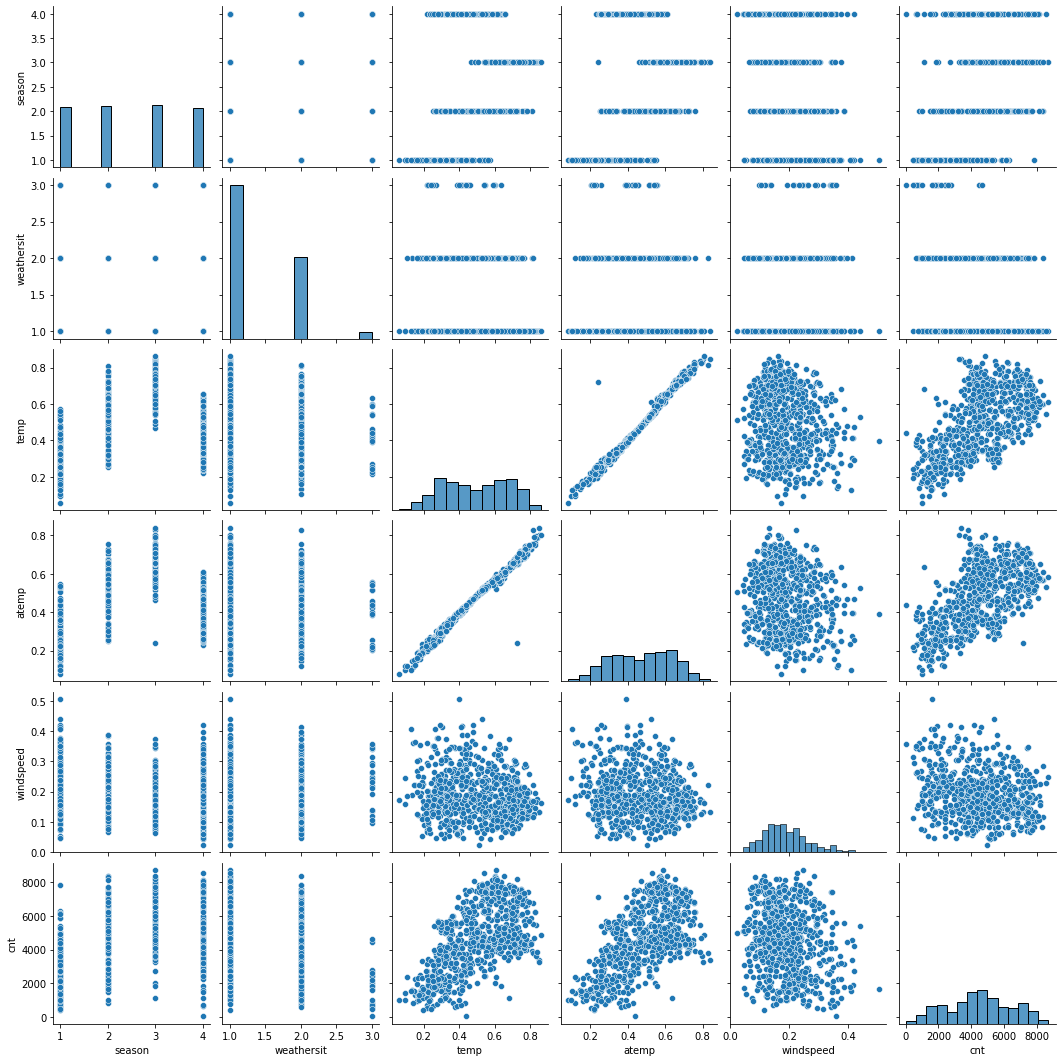

In [16]:
# create a pairplot to see the relationship between variables (linear or nonlinear, whether there is a more obvious correlation)
sns.pairplot(data = dss) 
# https://www.geeksforgeeks.org/data-visualization-with-pairplot-seaborn-and-pandas/ 
# https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6

## from above pairplot, we can see that 
### there is obvious relationship between temp and atemp, 
### there is also obvious correlation between temp and cnt, atemp and cnt

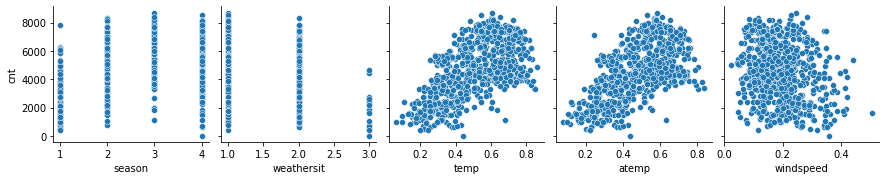

In [17]:
sns.pairplot(data = dss, x_vars = ['season','weathersit','temp', 'atemp', 'windspeed'], y_vars = 'cnt' )

<AxesSubplot:xlabel='cnt', ylabel='season'>

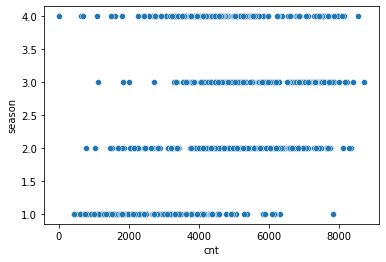

In [24]:
## create scatterplot to further see the variables of 'season' and "cnt" relations

sns.scatterplot(data = dss, x = 'cnt', y = 'season')

<AxesSubplot:xlabel='cnt', ylabel='weathersit'>

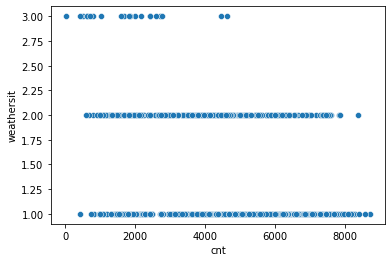

In [25]:
## create scatterplot to further see the variables of 'weathersit' and "cnt" relations
sns.scatterplot(data = dss, x = 'cnt', y = 'weathersit')

<AxesSubplot:xlabel='cnt', ylabel='temp'>

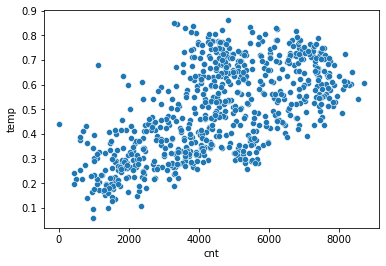

In [26]:
## create scatterplot to further see the variables of 'temp' and "cnt" relations
sns.scatterplot(data = dss, x = 'cnt', y = 'temp')

<AxesSubplot:xlabel='cnt', ylabel='atemp'>

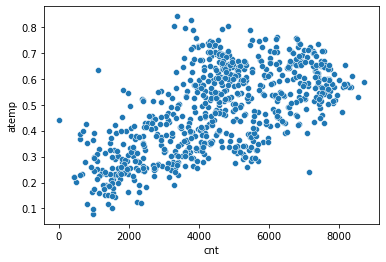

In [27]:
## create scatterplot to further see the variables of 'atemp' and "cnt" relations
sns.scatterplot(data = dss, x = 'cnt', y = 'atemp')

<AxesSubplot:xlabel='cnt', ylabel='windspeed'>

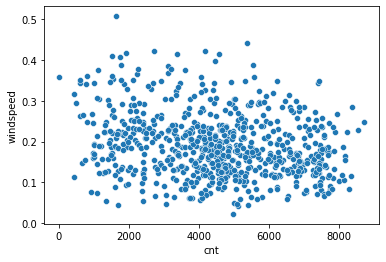

In [28]:
## create scatterplot to further see the variables of 'windspeed' and "cnt" relations
sns.scatterplot(data = dss, x = 'cnt', y = 'windspeed')

<AxesSubplot:xlabel='temp', ylabel='atemp'>

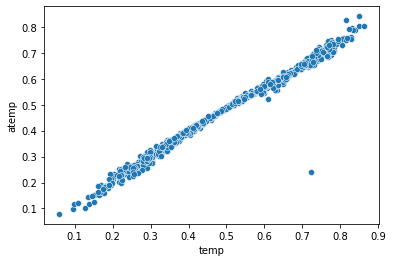

In [29]:
## create scatterplot to further see the variables of 'temp' and "atemp" relations
sns.scatterplot(data = dss, x = 'temp', y = 'atemp')

## from above scatterplot, we clear see that
### there is obvious relationship between temp and atemp,
### there is also correlation between temp and cnt, atemp and cnt

C:\Users\wangk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


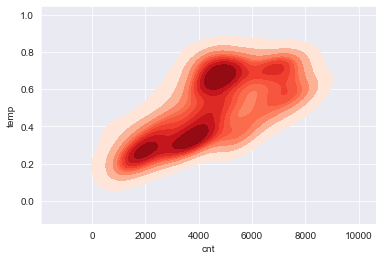

In [30]:
## Use kde plot to do a deep analysis of temp and cnt
sns.set_style('darkgrid')
sns.kdeplot(dss['cnt'], dss['temp'], color='r', shade = True, cmap = "Reds")
plt.show()

## reference: https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

C:\Users\wangk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


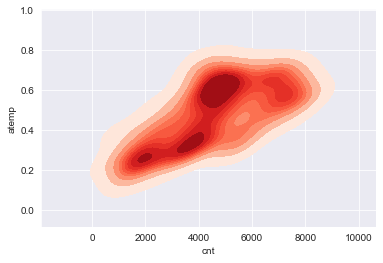

In [31]:
## Use kde plot to do a deep analysis of atemp and cnt
sns.kdeplot(dss['cnt'], dss['atemp'], color='r', shade = True, cmap = "Reds")
plt.show()

In [ ]:
## from above 2 kde plots temp&cnt, and atemp&cnt, we find the following
### when cnt(the count of rent bike) between 1800-2300 has the following: 
#### temp(temperature) is between 0.25-0.3. 
#### atemp(feeling temperature) is between 0.24-0.3. 

### when cnt(the count of rent bike) between 3000-4000 has the following:
#### temp(temperature) is between 0.32-0.42.
#### atemp(feeling temperature) is between 0.31-0.4.

### when cnt(the count of rent bike) between 4000-5500 has the following:
#### temp(temperature) is between 0.6-0.72.
#### atemp(feeling temperature) is between 0.5-0.7.

C:\Users\wangk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


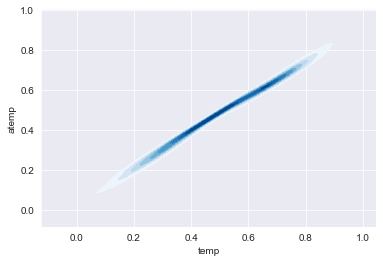

In [32]:
sns.kdeplot(dss['temp'], dss['atemp'], color='b', shade = True, cmap = "Blues")
plt.show()

In [ ]:
## from above kde plot temp and atem, we find the following
### when temp(temperature) between 0.18-0.84, atemp(feeling temperature) is between 0.17-0.8. 

In [31]:
# Multiple regression

import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Variable selection: the relevant items temp and atemp
X = dss[['temp','atemp']] # explanatory variable
y = dss['cnt']
X

,temp,atemp
0,0.344167,0.363625
1,0.363478,0.353739
2,0.196364,0.189405
3,0.200000,0.212122
4,0.226957,0.229270
...,...,...
726,0.254167,0.226642
727,0.253333,0.255046
728,0.253333,0.242400
729,0.255833,0.231700


In [53]:
#Split the data
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
X_train

,temp,atemp
682,0.343333,0.323225
250,0.633913,0.555361
336,0.299167,0.310604
260,0.507500,0.490537
543,0.697500,0.640792
...,...,...
71,0.384348,0.380091
106,0.456667,0.445696
270,0.635000,0.575158
435,0.361739,0.359670


In [54]:
X_test

,temp,atemp
703,0.475833,0.469054
33,0.186957,0.177878
300,0.330833,0.318812
456,0.425833,0.417287
633,0.550000,0.544179
...,...,...
70,0.329167,0.325750
192,0.794167,0.739275
328,0.375000,0.380671
165,0.626667,0.587754


In [55]:
#Model training

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict on some input data

Xvals = np.array([0.35,0.35]).reshape(1,2) # need two columns
lm.predict(Xvals) # prediction .


C:\Users\wangk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3594.66819309])

In [57]:
# Model evaluation
## Evaluate on test data and training data separately
y_train_predict = lm.predict(X_train)# evalution on train data
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

y_test_predict = lm.predict(X_test)# evaluate on test data
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

In [59]:
print(rmse,r2)

print(rmse_test,r2_test)

1492.660242006232 0.3921942176183342
1537.953771649489 0.4101318608615666


In [ ]:
# These indicate that our model doesnot work very well in this case, because 0.39 and 0.41 is not nearly 1